# <p style="text-align:center;">Linear Regression from Scratch</p>
---
*<p style="text-align:right;">Reference: Machine Learning by Andrew Ng.</p>*


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

## Assumptions of Linear Regression

There are four assumptions associated with a linear regression model:

- <b>Linearity</b>: The relationship between X and the mean of Y is linear.
- <b>Homoscedasticity</b>: The variance of residual is the same for any value of X. It is an assumption of equal or similar variances in different groups being compared. This is an important assumption of parametric statistical tests because they are sensitive to any dissimilarities. Uneven variances in samples result in biased and skewed test results.
- <b>Independence</b>: Observations are independent of each other.
- <b>Normality</b>: For any fixed value of X, Y is normally distributed.

## California Housing Dataset
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). An household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.

* Number of Instances : 20640
* Number of Attributes : 8 numeric, predictive attributes and the target
* MedInc : median income in block group
* HouseAge : median house age in block group
* AveRooms : average number of rooms per household
* AveBedrms : average number of bedrooms per household
* Population : block group population
* AveOccup : average number of household members
* Latitude : block group latitude
* Longitude : block group longitude
* Missing Attribute Values : None

In [3]:
X,y = datasets.fetch_california_housing(return_X_y = True, as_frame = True)

In [4]:
df = pd.concat([X,y], axis = 1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
print("Shape of X: " + str(X.shape))
print("Shape of Y: " + str(y.shape))

Shape of X: (20640, 8)
Shape of Y: (20640,)


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Almost all the features have outliers. Median Income has avg. value of \\$38,70,671 but the maximum value is \\$1,50,00,100. House age has avg. value of 28.6 years but maximum value is 52 years, and so on.

<AxesSubplot:>

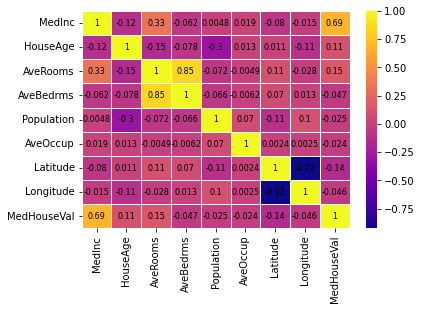

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, annot_kws = {'color':'black','size' : 8}, cmap = 'plasma', linewidth = 1)

Not much of the features seem to be correlated, so we would have to use all the features here, Multiple Linear Regression that is. A thing to mark is that Median House Income and Median House Value have a correlation $ \approx $ 0.7. So dropping one of the features will be helpful for learning. But here we will use all the features instead just for the sake of implementation. Trying to visualize the 2D analogue of the dataset, we can say that: 

Our training data set is scattered on the x-y plane. We are trying to make a straight line (defined by $ ℎ_𝜃(𝑥^{(𝑖)}) $) which passes through these scattered data points.

<blockquote><em>Idea: Choose, paramenters $ \theta : (\theta_0 , \theta_1, ..., \theta_n)\in \mathbb{R}^{n+1} $, so that $ ℎ_𝜃(𝑥) $ is close to 𝑦 for our training examples (𝑥, 𝑦).</em></blockquote>

 We now introduce notation for equations where we can have any number of input variables.

$ \large x_j ^{(i)} $ = Value of feature $ j $ in $ i^{th} $ training example
<br>$ \large x^{(i)} $ = feature value vector of $ i^{th} $ training example = $ \begin{bmatrix} x^{(i)}_0  & x^{(i)}_1 & x^{(i)}_2 & \ldots & x^{(i)}_n \end{bmatrix} \in \mathbb{R}^{n+1} $ , extra bias feature $ x^{(i)}_0 = 1 $
<br>$ \large m $ = # Training Examples = 14,450 here ,i.e, 70% of all the 20,640 instances 
<br>$ \large n $ = # Features (8 here, excluding the o/p feature)
<br>$ \large h(x^{(i)}) $ = prediction of price of $ i^{th} $ training example

<center><br><br> 
    $ \large X_{train} = \begin{bmatrix} \longleftarrow x^{(0)} \longrightarrow \\ \longleftarrow x^{(1)} \longrightarrow \\ \longleftarrow x^{(2)} \longrightarrow \\ \vdots \\ \longleftarrow x^{(14,450)} \longrightarrow \end{bmatrix} $ 
    $ \large y_{train} = \begin{bmatrix}y^{(0)} \\ y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(14,450)} \end{bmatrix} $ 
    $ \large H_{train} = \begin{bmatrix}h(x^{(0)}) \\ h(x^{(1)}) \\ h(x^{(2)}) \\ \vdots \\ h(x^{(14,450)}) \end{bmatrix} $ <br><br>
    $ \large X_{test} = \begin{bmatrix} \longleftarrow x^{(14,451)} \longrightarrow \\ \longleftarrow x^{(14,452)} \longrightarrow \\ \longleftarrow x^{(14,453)} \longrightarrow \\ \vdots \\ \longleftarrow x^{(20,639)} \longrightarrow \end{bmatrix} $ 
    $ \large y_{test} = \begin{bmatrix}y^{(14,451)} \\ y^{(14,452)} \\ y^{(14,453)} \\ \vdots \\ y^{(20,639)} \end{bmatrix} $ $ \large H_{test} = \begin{bmatrix}h(x^{(14,451)}) \\ h(x^{(14,452)}) \\ h(x^{(14,453)}) \\ \vdots \\ h(x^{(20,639)}) \end{bmatrix} $</center>


---
# From Scratch

## Splitting into Train & Test Data

In [8]:
M = len(df) # 0 to 20,640
m = 14450 # 0 to 14,450
n = 8
X_train = X.loc[0:m]
y_train = y.loc[0:m]

X_test = X.loc[ m+1 : M-1 ]
y_test = y.loc[ m+1 : M-1 ]

In [9]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14451,3.9187,39.0,5.610942,1.063830,765.0,2.325228,32.81,-117.25
14452,3.2109,34.0,4.026764,1.094891,870.0,2.116788,32.84,-117.27
14453,2.9306,41.0,4.522293,1.076433,640.0,2.038217,32.84,-117.28
14454,3.8750,39.0,4.589242,1.041565,805.0,1.968215,32.83,-117.27
14455,3.7306,34.0,3.864297,1.054927,933.0,1.507270,32.83,-117.28


In [11]:
y_train.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [12]:
y_test.head()

14451    3.119
14452    3.760
14453    3.603
14454    4.100
14455    5.000
Name: MedHouseVal, dtype: float64

In [13]:
print("Shape of X_train:", X_train.shape, "Shape of y_train: ", y_train.shape)
print("Shape of X_test:", X_test.shape, "Shape of y_test: ", y_test.shape)

Shape of X_train: (14451, 8) Shape of y_train:  (14451,)
Shape of X_test: (6189, 8) Shape of y_test:  (6189,)


First we create a scatter plot to visualize the relationship of all the independent variables(MedInc, HouseAge, AveRooms, ...) with the dependent variable(MedHouseVal).

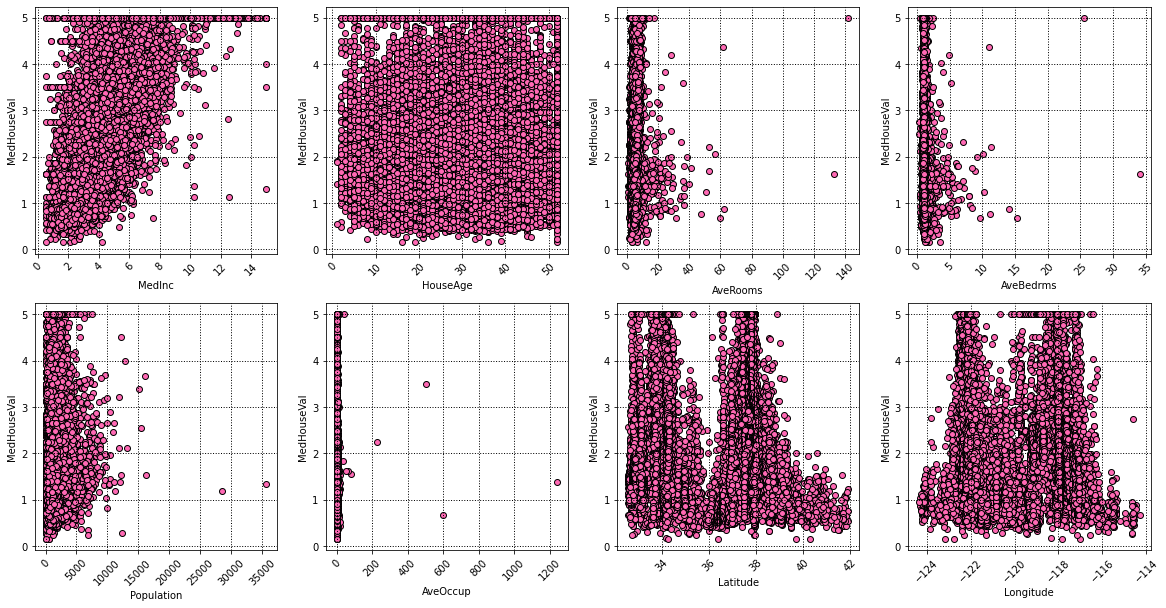

In [14]:
features = list(enumerate(X_train.columns))

plt.figure(figsize = (20,10))
k = 0

for i in enumerate(features):
    plt.subplot(2, 4, i[0]+1)
    plt.scatter(df.loc[:,features[k][1]], y, color = 'hotpink', edgecolor = 'k')
    plt.xlabel(features[k][1])
    plt.ylabel('MedHouseVal')
    plt.grid(axis = 'both', color = 'k', ls = ':', lw = 1)
    plt.xticks(rotation = 45)
    k=k+1

Looking at the distribution of the features we have

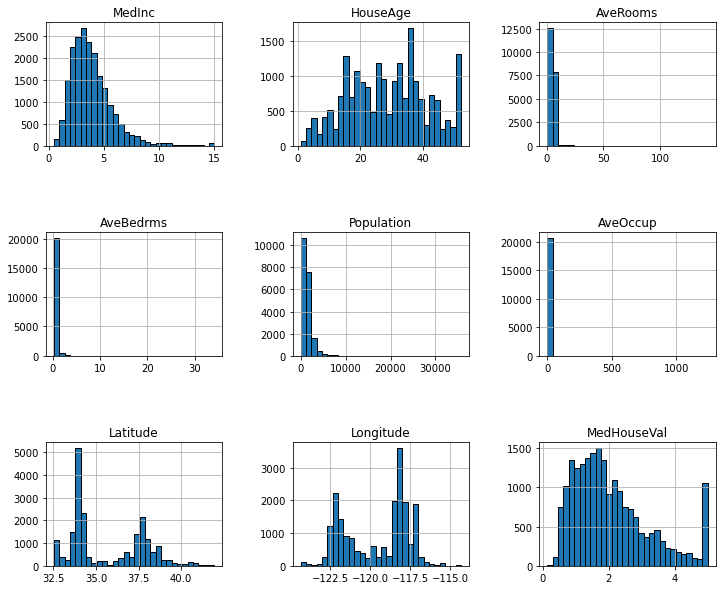

In [15]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## Hypothesis
Multivariate form of the hypothesis will look like: <br><br>
<center>$ \large h_\theta {(x)} = \theta_0 +  \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \ldots + \theta_8 \cdot x_8 $</center> 

which in vector form can be written as 

<center>$ \large h(x) = \theta^T \cdot x $ where,</center>


<br>
<center>$ \theta = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_8 \end{bmatrix} $ &
$ x = \begin{bmatrix}x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_{8} \end{bmatrix} $</center>
<br><br>

<center>$ \large H = \begin{bmatrix}h(x^{(0)}) \\ h(x^{(1)}) \\ h(x^{(2)}) \\ \vdots \\ h(x^{(20,639)}) \end{bmatrix} = \theta^T \cdot X = 
\begin{bmatrix}\theta^T x^{(0)} \\ \theta^T x^{(1)} \\ \theta^T x^{(2)} \\ \vdots \\ \theta^T x^{(20,639)} \end{bmatrix} $</center>
This is a vectorization of our hypothesis function for one training example. For each training example, our hypothesis will give the predicted price of the house. We will store all these 20,640 predicted values in an array `H` of same size. After doing so we will compare these predicted values (using Cost Function) with the actual values `y` and then update our parameters (using Gradient Descent) so that our total loss will be minimum. In order to develop intuition about this function, we can think about $ 𝜃_0 $ as the basic price of a house, we also assume $ 𝑥_0 = 1 $ which allows us to do matrix multiplications with $ \theta \in \mathbb{R}^{n+1} $ and $ x \in \mathbb{R}^{n+1} $ making the two vectors match each other element-wise.<br><br>

**Note**: `x` or $ x $ is the feature (value) vector of a single training example in the hypothesis while `X` or $ X $ is the actual i/p array consisting of all the training examples. Similarly `h` is the prediction for a single training example while `H` is the vector of all predictions for all training examples.

## Calculation Know-How
The below segment is a sample prediction for a randomly chosen training example. This is intended to show actually *HOW* the price will be predicted. We will have 20,648 h's like these for each example that we will store in our hypothesis vector `H`. The `h` that we got above will be included among many of the other predictions stored in the `H` vector. To create the hypothesis, we will first randomly initialise the parameter vector and the feature vector.

In [16]:
theta = np.random.randint(10, size = (9,1)) #theta in R(n+1)

In [17]:
x = np.insert(np.array(X_train.loc[3]), 0, 1) #inserting bias term 1
print("Randomly Initialising Theta Parameter Vector:\n", theta)
print("Randomly Selecting a training example with bias term insertion: \n", x)

Randomly Initialising Theta Parameter Vector:
 [[6]
 [8]
 [6]
 [6]
 [2]
 [7]
 [3]
 [3]
 [1]]
Randomly Selecting a training example with bias term insertion: 
 [   1.            5.6431       52.            5.8173516     1.07305936
  558.            2.54794521   37.85       -122.25      ]


In practice, we will use scaled feature vector of the training example. Now we generate a ***Hypothesis Vector*** `H_train` that will store all predicted values for all the training examples that the hypothesis has determined.

In [18]:
H_train = np.random.randint(1000, size = y_train.shape)
print("Randomly Initialising Hypothesis Vector:\n", H_train)

Randomly Initialising Hypothesis Vector:
 [819 484 169 ... 855 588 557]


Now to implement the hypothesis, i.e, calculate the predicted price, we will use the `np.dot()` function of Numpy Library. Since theta is essentially a vector but represented as array in python (notice the double bracket), we must convert it into 1d array before passing these as arguments in `np.dot` otherwise python will perform *broadcasting* over theta and x while computing the product. For this we will use the `flatten()` method. When 1d arrays are passed in `np.dot()` numpy calculates the inner product of both the arrays. 

In [19]:
h = np.dot(theta.flatten(), x)
h

4305.138863926941

## Feature Scaling
To make gradient descent work much faster we can have each of our input values roughly
in the same range. This is because θ will descend quickly on small ranges and slowly on
large ranges, and so will oscillate inefficiently down to the optimum when the variables are
very uneven.

In [20]:
X_train_scaled = (X_train - np.mean(X_train)) / (np.max(X_train) - np.min(X_train))
X_train_scaled.shape

(14451, 8)

In [21]:
X_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.313026,0.229742,0.011176,-0.002474,-0.039032,-0.000801,0.279596,-0.310237
1,0.311385,-0.162415,0.005888,-0.004015,0.033755,-0.001545,0.277444,-0.309241
2,0.239386,0.445428,0.020420,-0.001001,-0.032940,-0.000389,0.276367,-0.311234
3,0.128056,0.445428,0.002905,-0.001012,-0.030769,-0.000813,0.276367,-0.312230
4,0.004134,0.445428,0.006198,-0.000774,-0.030524,-0.001425,0.276367,-0.312230


Distribution of dataset after feature scaling: 

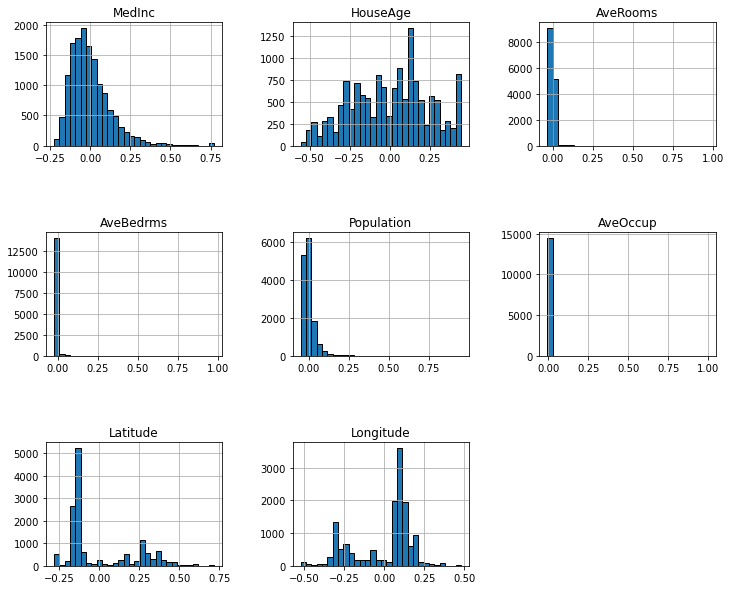

In [22]:
X_train_scaled.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## Cost Function
Our objective is to get the best possible line. The best possible line will be such so that the average squared vertical distances of the scattered
points from the line will be the least. In linear regression, we can measure the accuracy of our hypothesis function by using a cost function. *This takes an average difference (actually a fancier version of an average) of all the results of the hypothesis* with inputs from $x's$ and the actual output $y's$. Linear regression with multiple variables is also known as "multivariate linear regression". If we have overfitting from our hypothesis function, we can reduce the weight that some of the terms in our function carry by increasing their cost. The λ, or lambda, is the regularization parameter. It determines how much the costs of our theta parameters are inflated or penalized. The goal is to strike the right balance b/w
simplicity and training data-fit. Using the above cost function with the extra summation, we can smooth the output of our
hypothesis function to reduce overfitting. If lambda is chosen to be too large, it may smooth
out the function too much and cause underfitting. Hence, what would happen if λ=0 or is too
small? In this case the model will be more complex, and it might overfit the data.


In this case with our dataset that has 9 features (8 regular + 1 bias) and 20,640 examples our cost function will look like: <br><br>
<center>$ \large J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} {(h_{\theta} {(x^{(i)})} - y^{(i)})^2} + \lambda \sum\limits_{j=1}^{n} {(\theta_j)^2} $</center>

Note that the '$ i $' in this sum is *iterating over all the training examples* and '$j$' in this sum is *iterating over all the features*. Also the θ vector is indexed from 0 to n (holding n+1 values, $ 𝜃_0 $ through $ 𝜃_𝑛 $ ). Remember to **ALWAYS** regularize the bias term in Linear Regression. Henceforth, our implementation will be as follows:  

In [23]:
print("Training Hypothesis Vector:\n", H_train)
print("Theta Parameter Vector:\n", theta)

Training Hypothesis Vector:
 [819 484 169 ... 855 588 557]
Theta Parameter Vector:
 [[6]
 [8]
 [6]
 [6]
 [2]
 [7]
 [3]
 [3]
 [1]]


First we will insert the bias feature for all the training examples and then find the hypothesis vector by implementing $ H_{train}(x) = \theta^T \cdot X_{train}$. We will fill the this vector with prediction of each house.

In [24]:
#inserting bieas feature
X_train_scaled.insert ( 0, "Bias Feature", np.ones((len(X_train_scaled),1)) ) 

In [25]:
X_train_scaled.head() #final Dataset

,Bias Feature,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.0,0.313026,0.229742,0.011176,-0.002474,-0.039032,-0.000801,0.279596,-0.310237
1,1.0,0.311385,-0.162415,0.005888,-0.004015,0.033755,-0.001545,0.277444,-0.309241
2,1.0,0.239386,0.445428,0.020420,-0.001001,-0.032940,-0.000389,0.276367,-0.311234
3,1.0,0.128056,0.445428,0.002905,-0.001012,-0.030769,-0.000813,0.276367,-0.312230
4,1.0,0.004134,0.445428,0.006198,-0.000774,-0.030524,-0.001425,0.276367,-0.312230


Now we will construct a function `prediction` that calulates the predictions for each training examples and updates it in provided Hypothesis vector argument. It will take the arguments: 
* Theta Parameter vector 
* DataFrame whose predictions are to be made and
* An empty vector of same size to store predictions. 

We must ensure that shape of vector to store predictions must be same as the length of dataset passed as argument.

In [26]:
def prediction(theta, X_scaled, H):
    
    if  len(X_scaled) != H.shape[0]:
        print("Dataframe and Hypothesis vector shape mismatch")
        print("No. of rows in DataFrame: ", len(X_scaled))
        print("Shape of Hypothesis vector", H_train.shape[0])
        return 0
    
    else:
        #X_scaled = X_scaled.reset_index(drop=True)
        for i in range(len(X_scaled)):
            H[i] = np.dot(theta.flatten(), np.array(X_scaled.loc[i]))
        return H
    

In [27]:
H_train = prediction(theta, X_train_scaled, H_train)

In [28]:
H_train

array([10,  8, 10, ...,  5,  6,  7])

In [29]:
y_train[0:10] #comparing with actual price

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
Name: MedHouseVal, dtype: float64

Now, we will implement the cost function `J` that will calculate our errors in prediction.
<center>$ \large J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} {(h_{\theta} {(x^{(i)})} - y^{(i)})^2} + \lambda \sum\limits_{j=1}^{n} {(\theta_j)^2} $</center>

In [30]:
def costFunction(H, y, theta, lmbd):
    if H.shape != y.shape:
        print("Hypothesis Vector and Target Vector shape mismatch!")
        print("Shape of H: " ,  H.shape)
        print("Shape of y: " , y.shape)
        return 0
    
    elif theta.shape != (n+1,1):
        print("Theta Vector shape mismatch!")
        print("Shape of Theta: " , theta.shape)
        return 0
       
    else:
        L = (1 / (2*m)) * np.sum(np.square( np.array(H) - np.array(y) ))
        Reg = lmbd * np.sum(np.square(theta))
        J = L + Reg
        return J

In [31]:
costFunction(H_train, y_train, theta, 0.1)

31.776812214015912

## Gradient Descent
So, we have our hypothesis function and we have a way of measuring how well it fits into the data. Now we need to estimate the parameters in the hypothesis function. That's where gradient descent comes in. The way we do this is by taking the derivative (the tangential line to a function) of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent. The size of each step is determined by the parameter α, which is called the learning rate. α. A smaller α would result in a smaller step and a larger α results in a larger step. The direction in which the step is taken is determined by the partial derivative of $J$. At each iteration j, one should simultaneously update the parameters $(𝜽_𝟎 , 𝜽_𝟏, 𝜽_𝟐 , … … … , 𝜽_𝒏 )$. Updating a specific parameter prior to calculating another one on the $j^{th}$ iteration would yield to a wrong implementation. So, our update rule for gradient descent (regularized) will be, 

<center>$ \large \theta_j := \theta_j \cdot (1 - \alpha \frac {\lambda}{m}) - \frac {\alpha}{m} \sum\limits_{i=1}^{m} {(h_{\theta} {(x^{(i)})} - y^{(i)}) \cdot x_j ^ {(i)}} $</center>

The 1st term in the above equation, $ \large (1 - \alpha \frac {\lambda}{m})  $ will always be less than 1. 

The 2nd term $ \large (h_{\theta} {(x^{(i)})} - y^{(i)}) \cdot x_j ^ {(i)} $ is essentially $ \large \frac {\partial J(\theta)} {\partial \theta_j} $. 

Intuitively you can see it as reducing the value of $𝜃_𝑗$ by some amount on every update. Notice that the second term is now exactly the same as it was before. 

Now, we need to construct a function that evaluates the following two functions for a given input value θ: $ \large J(\theta) $ and $ \large \frac {\partial J(\theta)} {\partial \theta_j} = (h_{\theta} {(x^{(i)})} - y^{(i)}) \cdot x_j ^ {(i)} $.

The value $ J(\theta) $ will be returned by our `costFunction` function that we constructed earlier. Now we construct the function that returns the partial derivative term.

In [32]:
def partialDerivative(H, y, X_scaled):
    
    if H.shape != y.shape:
        print("Hypothesis Vector and Target Vector shape mismatch!")
        print("Shape of H: " ,  H.shape)
        print("Shape of y: " , y.shape)
        return 0
    
    else:
        diff = (np.array(H) - np.array(y)).reshape(-1,1)
        for i,j in X_scaled.iterrows():
            exm = np.array(X_train_scaled.loc[i]).reshape(1,-1)
            pD = np.dot( diff ,  exm ) 
         
        return pD
        

Now we implement the gradient descent using the above functions.

In [33]:
def gradientDescent(X_scaled, H, y, theta, alpha, lmbd, iterations):
    i = 0
    upd = np.empty((iterations,1))
    
    
    while i != iterations:
       
        pD = partialDerivative(H, y, X_scaled)
        
        theta = theta * (1 - alpha*lmbd/m) - (alpha/m) * np.sum(pD) #grad.Desc.
        
        H = prediction(theta, X_scaled, H)
        
        upd[i] = costFunction(H, y, theta, lmbd)
        
        if(upd[i]>upd[i-1] and i!=0): #if new cost > previous cost break out of loop
            break
        
        print("Iteration : ", i+1 , " | Cost: ", upd[i], "\n")
       
        
        i = i+1;
        
    
    return upd, H, theta

In [34]:
updates, H_train, theta = gradientDescent(X_train_scaled, H_train, y_train, theta, 0.09, 0.001, 80)#try for 80 epochs

Iteration :  1  | Cost:  [6.25267759] 

Iteration :  2  | Cost:  [5.12968541] 

Iteration :  3  | Cost:  [4.24697729] 

Iteration :  4  | Cost:  [3.5453107] 

Iteration :  5  | Cost:  [2.96386601] 

Iteration :  6  | Cost:  [2.50660177] 

Iteration :  7  | Cost:  [2.15561702] 

Iteration :  8  | Cost:  [1.85765] 

Iteration :  9  | Cost:  [1.6170929] 

Iteration :  10  | Cost:  [1.42448732] 

Iteration :  11  | Cost:  [1.27041746] 

Iteration :  12  | Cost:  [1.14154587] 

Iteration :  13  | Cost:  [1.04788631] 

Iteration :  14  | Cost:  [0.97193981] 

Iteration :  15  | Cost:  [0.9112879] 

Iteration :  16  | Cost:  [0.8542704] 

Iteration :  17  | Cost:  [0.80986028] 

Iteration :  18  | Cost:  [0.77118205] 

Iteration :  19  | Cost:  [0.7425251] 

Iteration :  20  | Cost:  [0.71976941] 

Iteration :  21  | Cost:  [0.6996678] 

Iteration :  22  | Cost:  [0.6854079] 

Iteration :  23  | Cost:  [0.67313355] 

Iteration :  24  | Cost:  [0.66282785] 

Iteration :  25  | Cost:  [0.653930

Text(0, 0.5, 'Cost Function')

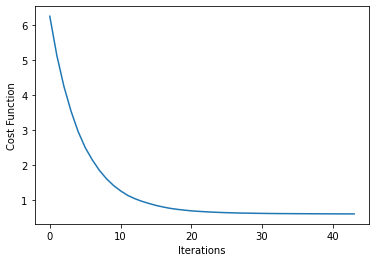

In [39]:
plt.plot(np.arange(44), updates[0:44])
plt.xlabel("Iterations")
plt.ylabel("Cost Function")

In [41]:
H_train

array([5, 4, 5, ..., 2, 2, 3])

In [42]:
y_train

0        4.52600
1        3.58500
2        3.52100
3        3.41300
4        3.42200
          ...   
14446    3.26500
14447    5.00001
14448    4.50000
14449    3.32400
14450    3.94400
Name: MedHouseVal, Length: 14451, dtype: float64

Now we will test our model on the testing data

In [43]:
H_test = np.empty(y_test.shape)
X_test_scaled = (X_test - np.mean(X_test)) / (np.max(X_test) - np.min(X_test))
X_test_scaled.shape

(6189, 8)

In [44]:
X_test_scaled.insert( 0, "Bias Feature", np.ones((len(X_test_scaled),1)) )
X_test_scaled.head()

,Bias Feature,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14451,1.0,-0.010281,0.232617,0.003672,-0.001220,-0.017769,-0.000667,-0.386556,0.461243
14452,1.0,-0.059094,0.134578,-0.040415,0.003313,-0.014825,-0.000834,-0.383367,0.458515
14453,1.0,-0.078425,0.271833,-0.026625,0.000619,-0.021273,-0.000898,-0.383367,0.457150
14454,1.0,-0.013294,0.232617,-0.024762,-0.004470,-0.016647,-0.000954,-0.384430,0.458515
14455,1.0,-0.023253,0.134578,-0.044937,-0.002519,-0.013059,-0.001325,-0.384430,0.457150


In [45]:
def predictionTest(theta, X_scaled, H):
    
    if  len(X_scaled) != H.shape[0]:
        print("Dataframe and Hypothesis vector shape mismatch")
        print("No. of rows in DataFrame: ", len(X_scaled))
        print("Shape of Hypothesis vector", H_train.shape[0])
        return 0
    
    else:
        X_scaled = X_scaled.reset_index(drop=True)
        for i in range(len(X_scaled)):
            H[i] = np.dot(theta.flatten(), np.array(X_scaled.loc[i]))
        return H

In [46]:
theta

array([[ 2.50786665],
       [ 4.50786609],
       [ 2.50786665],
       [ 2.50786665],
       [-1.49213223],
       [ 3.50786637],
       [-0.49213251],
       [-0.49213251],
       [-2.49213195]])

In [47]:
H_test = predictionTest(theta, X_test_scaled, H_test)

In [48]:
H_test

array([2.03467936, 1.467077  , 1.74357215, ..., 1.24989258, 1.35633497,
       1.45622919])

In [49]:
y_test

14451    3.119
14452    3.760
14453    3.603
14454    4.100
14455    5.000
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 6189, dtype: float64

## Model Evaluation

Just because a learning algorithm fits a training set well, that does not mean it is a good hypothesis. It could over fit and as a result your predictions on the test set would be poor. The error of your hypothesis as measured on the data set with which you trained the
parameters will be lower than the error on any other data set.

### 1. Cost on Testing Data
This is simply obtained by computing the cost for testing dataset. We use our previous function `costFunction` to do so. Note that, lambda should be passed as zero since we arent training our model anymore

In [50]:
J_test = costFunction(H_test, y_test.reset_index(drop=True), theta, 0)

In [51]:
J_test

0.25016879942134623

### 2. R Square Value
R Square measures how much variability in dependent variable can be explained by the model. It is the square of the Correlation Coefficient(R) and that is why it is called R Square.

<center>$ \huge R^2 = 1 - \frac {\sum_i {(y^{(i)} - \hat y^{(i)})}^2 } {\sum_i {(y^{(i)} - \bar y^{(i)})}^2 } $</center>


<u>R Squared for Training Data</u>

In [52]:
RSS = np.sum(np.square(y_train - H_train))
TSS = np.sum(np.square(y_train - np.mean(y_train)))

R_squared_train = 1 - (RSS/TSS)
R_squared_train

0.12358869596333877

<u>R Squared for Testing Data</u>

In [53]:
RSS_test = np.sum(np.square(y_test - H_test))
TSS_test = np.sum(np.square(y_test - np.mean(y_test)))

R_squared_test = 1 - (RSS_test/TSS_test)
R_squared_test

0.19249311795402713